**Цель работы:**

Изучение алгоритмов и методов регрессии на практике.

# Загрузка набора данных

### Описание предметной области

Вариант № 4

Набор данных: regression.xlsx

Атрибуты:  значения x1, x2, y 

### 1. Чтение файла (набора данных)

In [48]:
import pandas as pd
df = pd.read_excel(r"C:\Users\derya\Downloads\LR3_AD\regression.xlsx", sheet_name='var4', header=0) # импорт библиотек, чтение файла с помощью pandas
df.dropna(how='all', inplace=True)

### 2. Обзор данных

#### 2.1 Вывод первых 5 строк с помощью метода head

In [49]:
print(df.head(10))

         x1        x2         y
0  0.187634  0.878134 -0.791517
1  0.207120  0.831501 -0.753785
2  0.157440  0.155873 -0.296641
3 -0.125734  0.118325 -0.120361
4 -0.067999  0.844490 -1.278531
5  0.094772  0.383483 -0.167593
6  0.680591  0.399781  0.060013
7 -0.013092  0.532625 -0.395215
8  0.579832  0.620763 -0.960002
9 -0.073397  0.453911 -0.663121


#### 2.2 Оценка данных с помощью метода info

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


#### 2.3 Оценка данных с помощью метода describe.

In [51]:
df.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.000000
mean,0.193987,0.612995,-0.560116
std,0.355505,0.340701,0.553731
min,-1.039552,-0.492713,-2.663255
25%,-0.035919,0.386963,-0.923894
50%,0.196039,0.608436,-0.553656
75%,0.438024,0.846141,-0.209430
max,1.317863,1.681921,1.156469


#### 2.4 Проверка пропусков

In [52]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

#### 2.5 Проверка дубликатов

In [53]:
print(df.duplicated().sum())

0


### 3. Простая линейная регрессия

#### 3.1 Обучение моделей простой (парной) линейной регрессии, используя для обучения значения х1 и y , а затем х2 и y

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X1 = df[['x1']] 
X2 = df[['x2']]
y  = df['y']

X1_train, X1_valid, y_train, y_valid = train_test_split(
    X1, y, test_size=0.25, random_state=0
)
X2_train, X2_valid, _, _ = train_test_split(
    X2, y, test_size=0.25, random_state=0
)

model1 = LinearRegression().fit(X1_train, y_train)
model2 = LinearRegression().fit(X2_train, y_train)

pred1 = model1.predict(X1_valid)
pred2 = model2.predict(X2_valid)

#### 3.2 Расчет метрик качества

In [55]:
from sklearn import metrics
import pandas as pd

# МОДЕЛЬ 1
print(f"{'-'*16} МОДЕЛЬ ПАРНОЙ ЛИНЕЙНОЙ РЕГРЕССИИ: y ~ x1 {'-'*16}")

# Таблица: истинные и предсказанные
df_match1 = pd.DataFrame({
    'actual': y_valid.values,
    'predicted': pred1 
}).reset_index(drop=True)

print("\n Истинные и предсказанные значения (первые 10 строк):")
print(df_match1.head(10).to_string(index=False))

# Метрики
mae1 = metrics.mean_absolute_error(y_valid, pred1)
mse1 = metrics.mean_squared_error(y_valid, pred1)
rmse1 = np.sqrt(mse1)
r2_1 = metrics.r2_score(y_valid, pred1)

print("\n Метрики качества:")
print(f"   MAE  = {mae1:.6f}  → средняя абсолютная ошибка")
print(f"   MSE  = {mse1:.6f}  → среднеквадратичная ошибка")
print(f"   RMSE = {rmse1:.6f} → корень из MSE")
print(f"   R²   = {r2_1:.6f}   → доля объяснённой дисперсии")

# МОДЕЛЬ 2
print(f"\n{'-'*16} МОДЕЛЬ ПАРНОЙ ЛИНЕЙНОЙ РЕГРЕССИИ: y ~ x2 {'-'*16}")

df_match2 = pd.DataFrame({
    'actual': y_valid.values,
    'predicted': pred2
}).reset_index(drop=True)

print("\n Истинные и предсказанные значения (первые 10 строк):")
print(df_match2.head(10).to_string(index=False))

mae2 = metrics.mean_absolute_error(y_valid, pred2)
mse2 = metrics.mean_squared_error(y_valid, pred2)
rmse2 = np.sqrt(mse2)
r2_2 = metrics.r2_score(y_valid, pred2)

print("\n Метрики качества:")
print(f"   MAE  = {mae2:.6f}  → средняя абсолютная ошибка")
print(f"   MSE  = {mse2:.6f}  → среднеквадратичная ошибка")
print(f"   RMSE = {rmse2:.6f} → корень из MSE")
print(f"   R²   = {r2_2:.6f}   → доля объяснённой дисперсии")

---------------- МОДЕЛЬ ПАРНОЙ ЛИНЕЙНОЙ РЕГРЕССИИ: y ~ x1 ----------------

 Истинные и предсказанные значения (первые 10 строк):
   actual  predicted
-0.228667  -0.541343
-1.115035  -0.571699
-0.923205  -0.543046
-0.775483  -0.569518
 0.095140  -0.564983
 0.224321  -0.552015
 0.049305  -0.572493
-0.949334  -0.578113
-0.794168  -0.568553
-0.600392  -0.584998

 Метрики качества:
   MAE  = 0.452652  → средняя абсолютная ошибка
   MSE  = 0.336391  → среднеквадратичная ошибка
   RMSE = 0.579992 → корень из MSE
   R²   = -0.003374   → доля объяснённой дисперсии

---------------- МОДЕЛЬ ПАРНОЙ ЛИНЕЙНОЙ РЕГРЕССИИ: y ~ x2 ----------------

 Истинные и предсказанные значения (первые 10 строк):
   actual  predicted
-0.228667  -0.654756
-1.115035  -0.272011
-0.923205  -0.631342
-0.775483  -0.494733
 0.095140  -0.329486
 0.224321  -0.755134
 0.049305  -0.261715
-0.949334  -1.033497
-0.794168  -0.813029
-0.600392  -0.501503

 Метрики качества:
   MAE  = 0.406954  → средняя абсолютная ошибка
   MSE 

---
## **Интерпритация**

**Модель x1**

Средняя абсолютная ошибка MAE, равная 0.453 говорит о том, что предсказания модели в среднем отклоняются от реальных значений на примерно 0.45 единицы. Если принять, что разброс целевой переменной y около 1, это довольно высокая ошибка, поскольку модель незначительно снижает неопределённость по сравнению с простым прогнозом среднего значения. Среднеквадратичная ошибка MSE, равная 0.336 и корень RMSE, равный 0.580 также подтверждают, что расхождение между прогнозами и наблюдаемыми значениями остаётся существенным. Коэффициент детерминации R², равный -0.003 показывает, что модель не объясняет вариацию y вовсе, так как отрицательное значение означает, что использование линейной зависимости от x1 даёт результат даже немного хуже, чем обычный прогноз среднего.

Таким образом, переменная x1 практически не влияет на y в линейной форме. Ошибки достаточно велики, а объясняющая способность отсутствует. 

**Модель x2**

Показатель MAE = 0.407, что указывает на то, что средняя ошибка прогнозов составляет около 0.4 единицы, что заметно меньше, чем у модели с x1. Это говорит о более точном соответствии прогнозов фактическим данным. Показатели MSE = 0.249 и RMSE = 0.499 показывают, что отклонения прогнозов меньше естественного разброса y. Модель частично улавливает закономерности, присутствующие в данных. Показатель R² = 0.258 означает, что около 26% вариации целевой переменной объясняется линейной зависимостью от x2. 

Таким образом, x2 демонстрирует умеренную линейную связь с y. Хотя модель не идеальна по точности, переменная остаётся информативной и способна улучшить предсказания при совместном анализе с другими признаками.

---

#### 3.3 Получение коэффициентов a и b

In [19]:
print("\n" + "="*60)
print("КОЭФФИЦИЕНТЫ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*60)

# Извлечение коэффициентов
x1_a = model1.coef_[0]
x1_b = model1.intercept_
x2_a = model2.coef_[0]
x2_b = model2.intercept_

# Таблица коэффициентов
print("\nТаблица коэффициентов:")
print(f"{'Модель':<12} {'a':<12} {'b':<12}")

print("-" * 36)
print(f"{'y ~ x1':<12} {x1_a:<12.6f} {x1_b:<12.6f}")
print(f"{'y ~ x2':<12} {x2_a:<12.6f} {x2_b:<12.6f}")
print("-" * 36)


КОЭФФИЦИЕНТЫ ЛИНЕЙНОЙ РЕГРЕССИИ

Таблица коэффициентов:
Модель       a            b           
------------------------------------
y ~ x1       -0.068586    -0.549296   
y ~ x2       -0.832780    -0.051616   
------------------------------------


---
## **Интерпретация**

Анализ коэффициентов линейной регрессии показал, что переменная x2 оказывает сильное отрицательное влияние на y (коэффициент наклона a = −0.832780), в то время как x1 практически не влияет на целевую переменную (a = −0.068586).
Модель y ~ x2 позволяет интерпретировать: рост x2 на 1 единицу приводит к снижению y почти на 0.83 единицы, что делает x2 ключевым предиктором.
Модель y ~ x1 неинформативна: изменение x1 вызывает лишь незначительное снижение y на 0.07 единиц, что не имеет практической значимости.

---

#### Графики линейной регрессии

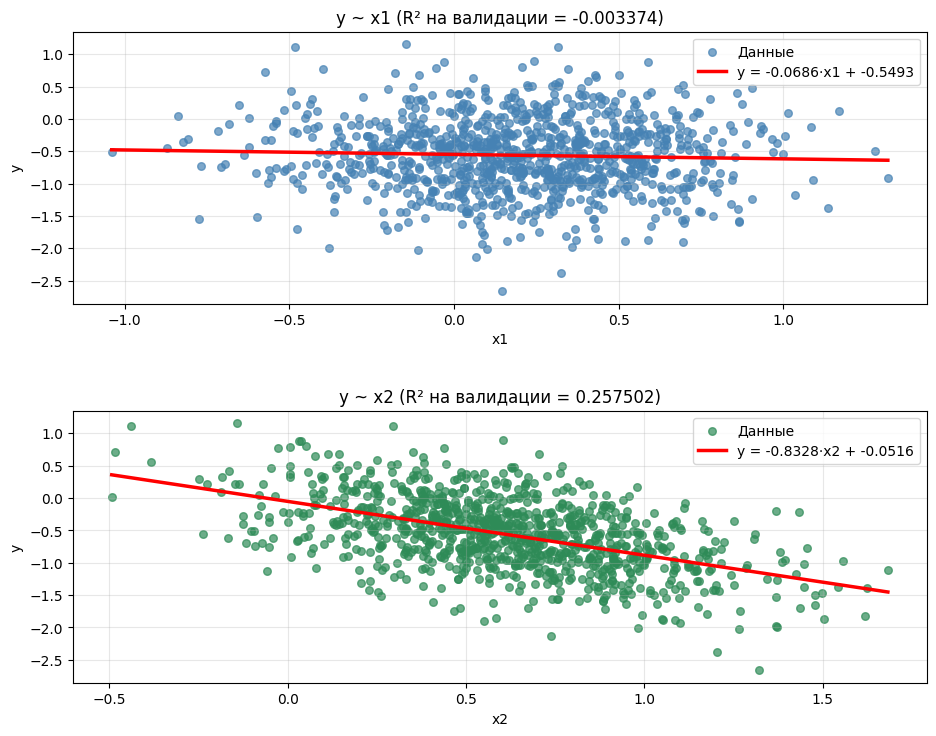

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# ГРАФИК 1 y ~ x1
scatter1 = ax1.scatter(df['x1'], df['y'], color='steelblue', alpha=0.7, s=30, label='Данные')
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 100)
line1 = ax1.plot(x1_range, x1_a * x1_range + x1_b, color='red', linewidth=2.5, label=f'y = {x1_a:.4f}·x1 + {x1_b:.4f}')

ax1.set_title(f"y ~ x1 (R² на валидации = {model1.score(X1_valid, y_valid):.6f})")

ax1.set_xlabel("x1")
ax1.set_ylabel("y")
ax1.legend()
ax1.grid(alpha=0.3)

# ГРАФИК 2 y ~ x2
scatter2 = ax2.scatter(df['x2'], df['y'], color='seagreen', alpha=0.7, s=30, label='Данные')
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 100)
line2 = ax2.plot(x2_range, x2_a * x2_range + x2_b, color='red', linewidth=2.5, label=f'y = {x2_a:.4f}·x2 + {x2_b:.4f}')

ax2.set_title(f"y ~ x2 (R² на валидации = {model2.score(X2_valid, y_valid):.6f})")
ax2.set_xlabel("x2")
ax2.set_ylabel("y")
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()

---
## **Интерпретация**

**График 1**
Линия регрессии почти горизонтальна и проходит через узкое облако точек из-за малого разброса x1. R² = −0.003374, значит модель не предсказывает лучше среднего значения y. Переменная x1 не оказывает значимого влияния.

**График 2**
Линия регрессии имеет сильный отрицательный наклон и точно проходит через нисходящий тренд данных. R² = 0.257502, что объясняет 25.75% дисперсии y, MAE, равное 0.406954 (на 10% ниже, чем у x1). Переменная x2 является значимым предиктором.

Таким образом, только x2 предсказывает y. x1 — неинформативен.

---

#### 3.4 Построение графиков остатков

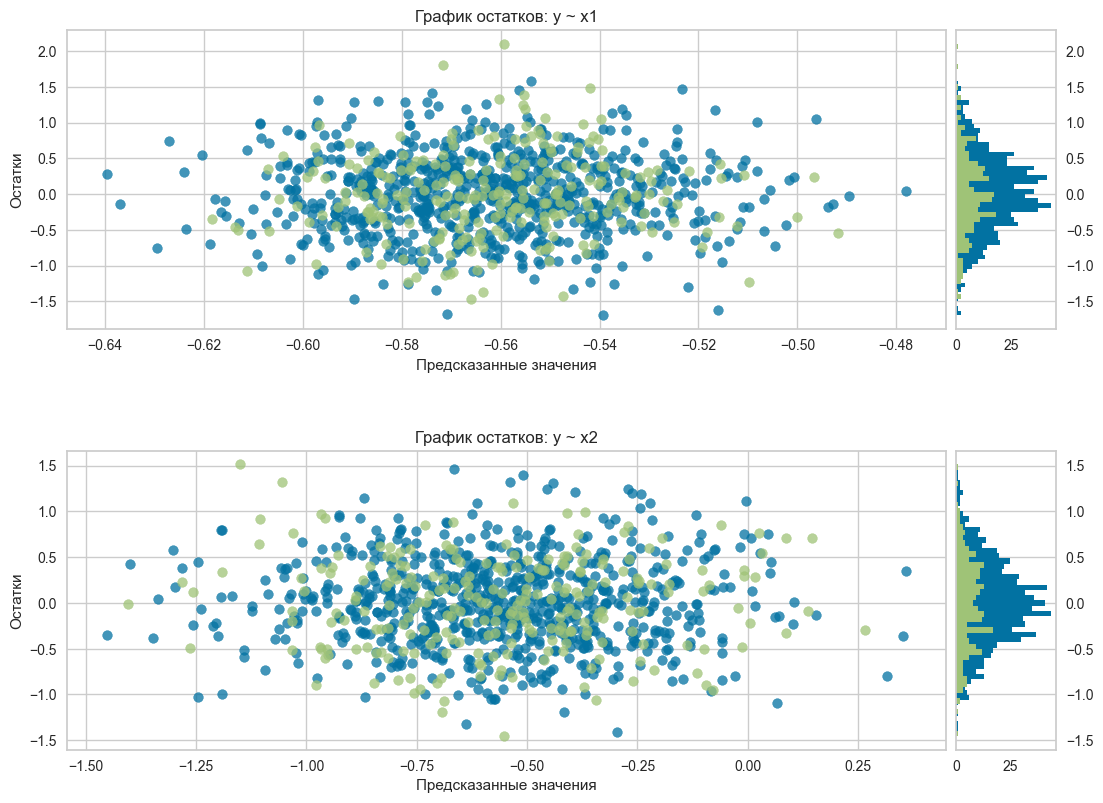

x1: остатки от -2.1038838564397646 до 1.4673366776799752
x2: остатки от -1.5122702660856433 до 1.4548270005352628


In [21]:
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9))

# ГРАФИК 1: y ~ x1 
visualizer1 = ResidualsPlot(
    model1,
    ax=ax1,
    hist=True,
    qqplot=False,
    title=None
)
visualizer1.fit(X1_train, y_train)
visualizer1.score(X1_valid, y_valid)

ax1.set_title('График остатков: y ~ x1')
ax1.set_xlabel('Предсказанные значения')
ax1.set_ylabel('Остатки')

# ГРАФИК 2: y ~ x2
visualizer2 = ResidualsPlot(
    model2,
    ax=ax2,
    hist=True,
    qqplot=False,
    title=None
)
visualizer2.fit(X2_train, y_train)
visualizer2.score(X2_valid, y_valid)

ax2.set_title('График остатков: y ~ x2')
ax2.set_xlabel('Предсказанные значения')
ax2.set_ylabel('Остатки')

plt.tight_layout(pad=3.5)
plt.show()

residuals1 = y_valid - pred1
residuals2 = y_valid - pred2

print("x1: остатки от", residuals1.min(), "до", residuals1.max())
print("x2: остатки от", residuals2.min(), "до", residuals2.max())

---
## **Интерпретация**

Модель y ~ x1 не удовлетворяет ключевым предположениям линейной регрессии: большой и нестабильный разброс остатков, отсутствие нормальности. Переменная x1 неинформативна.
Модель y ~ x2 удовлетворяет предположениям: остатки случайны, распределены компактно и близко к нормальному. Линейная зависимость присутствует, модель пригодна для использования.

Несмотря на визуальное сходство графиков остатков, модель y ~ x2 значительно лучше: диапазон ошибок меньше, MAE ниже, а R² положительный. Модель y ~ x1 не предсказывает лучше среднего.

---

#### 3.5 Построение графиков отклонения предсказанных значений

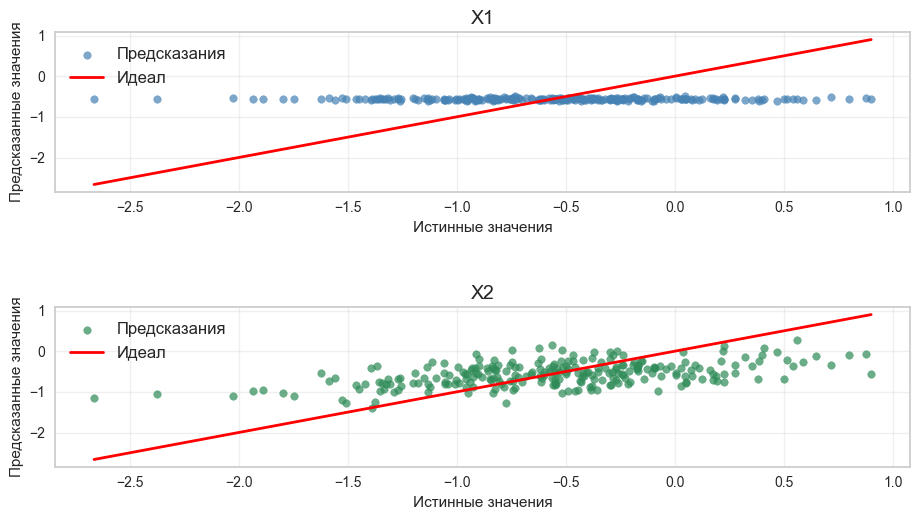

In [22]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# ГРАФИК 1: y ~ x1
ax1.scatter(y_valid, pred1, color='steelblue', alpha=0.7, s=30, label='Предсказания')
ax1.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 
         color='red', linewidth=2, label='Идеал')
ax1.set_title("X1", fontsize=14)
ax1.set_xlabel("Истинные значения")
ax1.set_ylabel("Предсказанные значения")
ax1.legend(fontsize=12)
ax1.grid(alpha=0.3)

# ГРАФИК 2: y ~ x2
ax2.scatter(y_valid, pred2, color='seagreen', alpha=0.7, s=30, label='Предсказания')
ax2.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 
         color='red', linewidth=2, label='Идеал')
ax2.set_title("X2", fontsize=14)
ax2.set_xlabel("Истинные значения")
ax2.set_ylabel("Предсказанные значения")
ax2.legend(fontsize=12)
ax2.grid(alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()

---
## **Интерпретация**

Графики сравнения истинных и предсказанных значений демонстрируют, что модель y ~ x1 практически не способна воспроизводить реальные значения целевой переменной, поскольку точки сильно разбросаны вокруг идеальной линии, предсказания сосредоточены в узком диапазоне около среднего, а коэффициент детерминации R² на валидации составляет −0.003, что указывает на полную бесполезность модели. 
В то же время модель y ~ x2 показывает заметно лучшие результаты: точки частично группируются вдоль красной линии, предсказания варьируются в соответствии с истинными значениями, а R² = 0.258 свидетельствует о том, что модель объясняет более четверти дисперсии зависимой переменной. 

Таким образом, несмотря на неидеальное совпадение, модель с признаком x2 обладает реальной предсказательной силой, тогда как модель с x1 не содержит полезной информации.

---

### 4 Полиномиальная линейная регрессия

#### 4.1. Обучение полиномиальной линейной модели

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

poly_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

poly_model.fit(X2_train, y_train)

pred_poly = poly_model.fit(X2_train, y_train).predict(X2_valid)

from sklearn.metrics import mean_absolute_error, r2_score

mae_poly = mean_absolute_error(y_valid, pred_poly)
r2_poly = r2_score(y_valid, pred_poly)

print(f"Полиномиальная регрессия (x2, степень 2):")
print(f"  MAE = {mae_poly:.6f}")
print(f"  R²  = {r2_poly:.6f}")

Полиномиальная регрессия (x2, степень 2):
  MAE = 0.406777
  R²  = 0.259068


#### 4.2. Получение предсказания и метрик

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Создание полиномиальных признаков 
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X2_poly_train = poly_features.fit_transform(X2_train)

# Обучение линейной регрессии на полиноме
lin_reg = LinearRegression()
lin_reg.fit(X2_poly_train, y_train)

# Преобразование валидационных данных 
X2_poly_valid = poly_features.transform(X2_valid)

poly_predictions = lin_reg.predict(X2_poly_valid)

# Метрики
mae_poly = mean_absolute_error(y_valid, poly_predictions)
r2_poly = r2_score(y_valid, poly_predictions)

print(f"Полиномиальная регрессия (y ~ x2, степень 2):")
print(f"  MAE = {mae_poly:.6f}")
print(f"  R²  = {r2_poly:.6f}")

Полиномиальная регрессия (y ~ x2, степень 2):
  MAE = 0.406777
  R²  = 0.259068


---
## **Интерпретация**

Полиномиальная регрессия второй степени на признаке x2 показала MAE = 0.4068 и R² = 0.2591, что практически не отличается от линейной модели (где MAE ≈ 0.407, R² ≈ 0.258). Улучшение менее 0.1%, что статистически и практически незначимо.

Таким образом, квадратичная зависимость в данных отсутствует. Линейная модель y ~ x2 оптимальна, она простая, устойчивая и не требует усложнения. Полиномиальная регрессия не оправдана.

---

#### 4.4. Визуализация регрессии

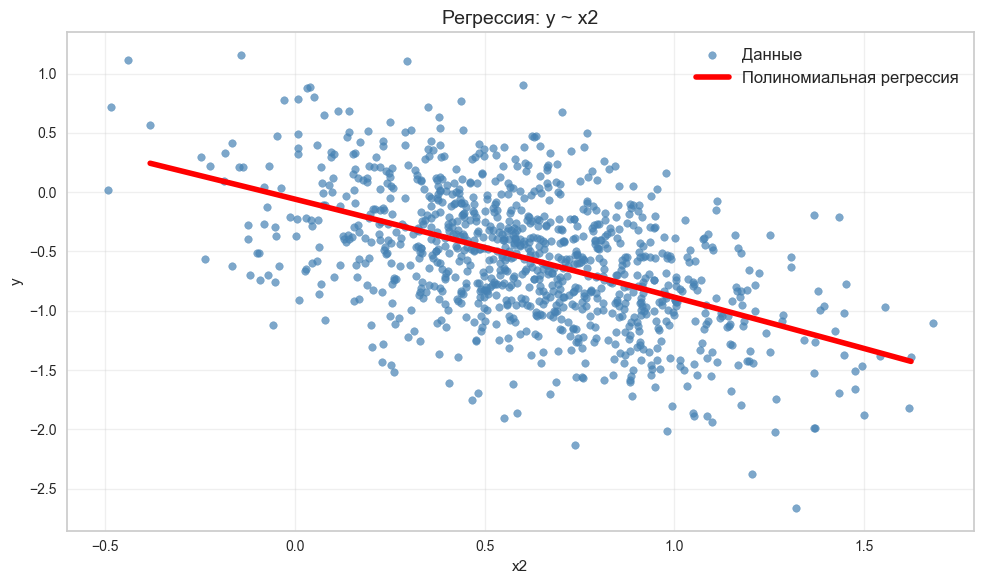

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(10, 6))
plt.scatter(df['x2'], df['y'], color='steelblue', alpha=0.7, s=30, label='Данные')

# Сортировка валидационных предсказаний по x2
valid_data = pd.DataFrame({
    'x2': X2_valid.values.flatten(),
    'pred': poly_predictions
})

valid_data_sorted = valid_data.sort_values('x2')

# Извлечение отсортированных значений
x2_sorted = valid_data_sorted['x2']
pred_sorted = valid_data_sorted['pred']

plt.plot(x2_sorted, pred_sorted, color='red', linewidth=4, label='Полиномиальная регрессия')

plt.title("Регрессия: y ~ x2", fontsize=14)
plt.xlabel("x2")
plt.ylabel("y")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---
## **Интерпретация**

График визуализации регрессии показывает, что полиномиальная модель 2-й степени на признаке x2 фактически воспроизводит прямую линию с отрицательным наклоном, полностью совпадающую с результатом простой линейной регрессии. Это подтверждает, что в данных отсутствует нелинейная зависимость, а квадратичный член не улучшает предсказания. Увеличение R² с 0.258 до 0.259 статистически и практически незначимо. Таким образом, лучше использовать линейную модель y ~ x2 — она проще, интерпретируема, не склонна к переобучению и даёт тот же результат, что и полиномиальная.

---

#### 4.5. Проведение эксперимента с другой степенью

Полиномиальная регрессия (y ~ x2, степень 5):
  MAE = 0.406058
  R²  = 0.258558


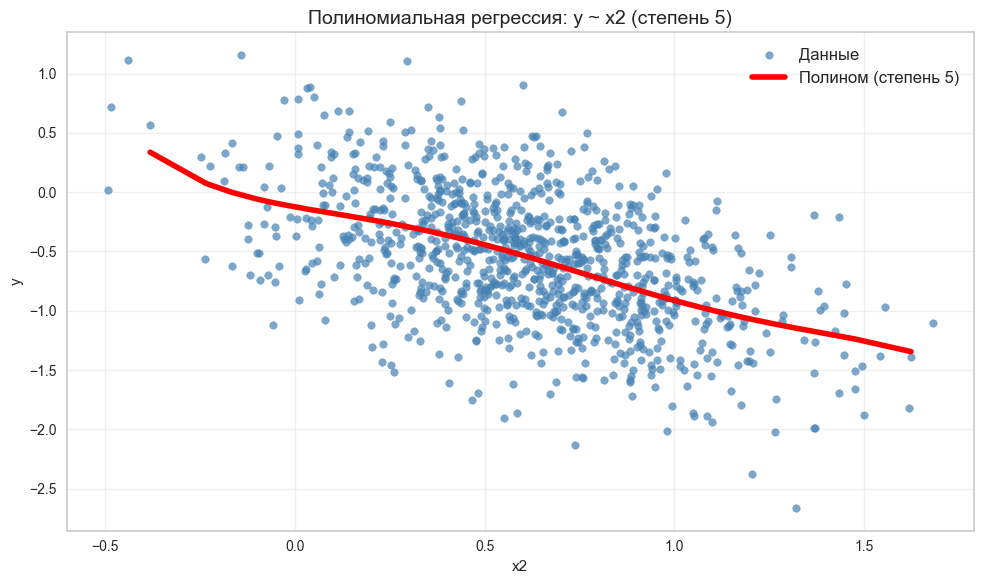

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

poly_features = PolynomialFeatures(degree=5, include_bias=False)

X2_poly_train = poly_features.fit_transform(X2_train)    
lin_reg = LinearRegression()
lin_reg.fit(X2_poly_train, y_train)                     

X2_poly_valid = poly_features.transform(X2_valid)        

poly_predictions = lin_reg.predict(X2_poly_valid)

mae = metrics.mean_absolute_error(y_valid, poly_predictions)
r2 = metrics.r2_score(y_valid, poly_predictions)

print(f"Полиномиальная регрессия (y ~ x2, степень 5):")
print(f"  MAE = {mae:.6f}")
print(f"  R²  = {r2:.6f}")

plt.figure(figsize=(10, 6))

plt.scatter(df['x2'], df['y'], color='steelblue', alpha=0.7, s=30, label='Данные')

valid_data = pd.DataFrame({
    'x2': X2_valid.values.flatten(),
    'pred': poly_predictions
})
valid_data_sorted = valid_data.sort_values('x2')
x2_sorted = valid_data_sorted['x2']
pred_sorted = valid_data_sorted['pred']

plt.plot(x2_sorted, pred_sorted, color='red', linewidth=4, label='Полином (степень 5)')

plt.title("Полиномиальная регрессия: y ~ x2 (степень 5)", fontsize=14)
plt.xlabel("x2")
plt.ylabel("y")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---
## **Интерпретация**

На графике полиномиальной регрессии 5-й степени видна кривящаяся красная линия с общим отрицательным наклоном, которая следует за основным трендом данных — чем больше x2, тем меньше y. Облако точек остаётся примерно таким же, как при линейной модели, то есть данные имеют чёткую линейную тенденцию. Однако высокая степень полинома приводит к излишним изгибам и колебаниям линии, особенно на краях диапазона x2, где она подстраивается под отдельные выбросы и шум, а не под общую закономерность. Это явный признак переобучения — модель слишком сложная для данных. Даже при небольшом росте R² (с 0.258 до 0.26), излишние колебания линии не соответствуют истинной зависимости и снижают способность модели к обобщению.

---

---
## **Вывод**

Для модели y ~ x2 оптимально использовать полином степени 1 (линейную регрессию). Полином 2-й степени даёт минимальное улучшение R² (с 0.258 до 0.259), которое не оправдывает усложнение, а полином 5-й степени приводит к переобучению: линия сильно колеблется, подстраивается под шум и теряет обобщающую способность, несмотря на небольшое повышение R² до 0.26. Если степень полинома слишком низкая, модель не улавливает даже линейную зависимость и даёт R² близкий к нулю. Если степень слишком большая, модель становится чрезмерно гибкой, запоминает случайные выбросы, а не общий тренд, и плохо работает на новых данных. Оптимальная степень — та, которая отражает реальную сложность зависимости без излишней гибкости, в данном случае степень 1 обеспечивает баланс между точностью, понятностью и надёжностью модели.

---

### 5 Решение задачи с помощью регрессионной модели

#### 5.1. Загрузка и подготовка данных

Набор данных: salary.csv

Описание столбцов:

    -age — возраст сотрудника в годах
    
    -income — годовой доход до текущей работы
    
    -experience — количество полных лет профессионального опыта
    
    -score_test — результат прохождения профессионального теста
    
    -hours_worked — среднее количество рабочих часов в неделю
    
    -distance_to_work — расстояние от дома до места работы
    
    -savings — сумма сбережений на банковском счёте
    
    -debt — общий объём текущих долгов (по кредитам, картам и другим обязательствам, в долларах)
    
    -education — уровень образования: «High School» (школа), «Bachelor» (бакалавр), «Master» (магистр) или «PhD» (доктор наук)
    
    -city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или Финикс
    
    -job_type — сфера профессиональной деятельности: IT, финансы, здравоохранение, образование или ритейл
    
    -marital_status — семейное положение: «Single» (холост/незамужем), «Married» (в браке) или «Divorced» (в разводе)
    
    -car — наличие автомобиля: «Yes» (есть) или «No» (нет)
    
    -remote_work — работает ли сотрудник удалённо: «Yes» или «No»
    
    -salary — годовая зарплата

In [7]:
import pandas as pd
df = pd.read_csv(r'C:\Users\derya\Downloads\LR3_AD/salary.csv')
print(df.describe())
print()
print(df.info())

               age        income   experience   score_test  hours_worked  \
count  1500.000000   1500.000000  1500.000000  1500.000000   1500.000000   
mean     43.732000  50493.562171    19.479333    74.649867     49.046000   
std      15.071771  15354.495706    11.471529     9.904426     17.053654   
min      18.000000   -826.421240     0.000000    41.604998     20.000000   
25%      31.000000  40525.989722    10.000000    67.776127     34.000000   
50%      44.000000  50784.690569    19.000000    74.701567     49.000000   
75%      56.000000  61104.997961    29.000000    81.635633     63.000000   
max      69.000000  98819.709397    39.000000   107.261317     79.000000   

       distance_to_work        savings          debt         salary  
count       1500.000000    1500.000000   1500.000000    1500.000000  
mean          10.169171   19920.723043   7656.749308   98573.093521  
std           10.003094   13635.530107   5481.390395  111786.756001  
min            0.018137     408.482

#### 5.2. Выделение целевой переменной, построение гистрограмм

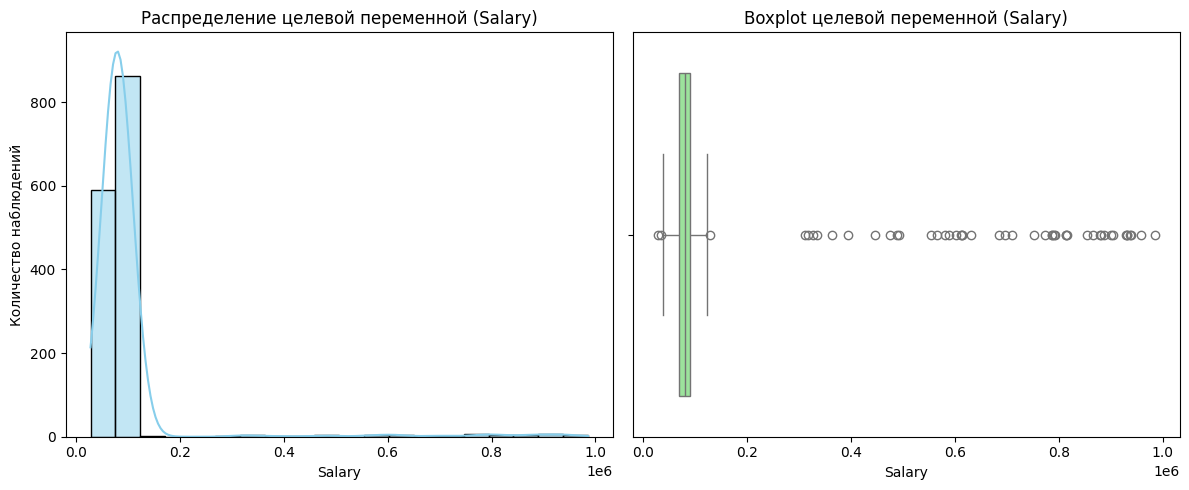

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'income', 'experience', 'score_test', 'hours_worked',
                'distance_to_work', 'savings', 'debt', 'salary']

y = df['salary'] #Выделение целевой переменной

plt.figure(figsize=(12,5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, bins=20, color='skyblue')
plt.title('Распределение целевой переменной (Salary)')
plt.xlabel('Salary')
plt.ylabel('Количество наблюдений')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=y, color='lightgreen')
plt.title('Boxplot целевой переменной (Salary)')
plt.xlabel('Salary')

plt.tight_layout()
plt.show()

---
## **Интерпретация**

Распределение зарплат имеет левостороннюю асимметрию — большинство значений сосредоточено в верхней части диапазона, а меньшие значения встречаются реже. На boxplot заметны выбросы в сторону больших значений, что указывает на наличие отдельных наблюдений с аномально высокими зарплатами. Такие значения могут искажать результаты модели, поэтому их удаление или отдельный анализ является оправданным шагом

---

#### 5.3. Обработка выбросов

In [11]:
# Расчёт квартилей и межквартильного размаха (IQR)
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3 - q1

#Определение нижней и верхней границ для нормальных значений
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Подсчёт доли выбросов
outlier_share = df.loc[
    (df['salary'] < lower_bound) | (df['salary'] > upper_bound),
    'salary'
].count() / df['salary'].count()

print(f"Доля выбросов относительно всех данных: {outlier_share:.2%}")

#Удаление выбросов и обновление индексов
df = df.loc[
    (df['salary'] >= lower_bound) & (df['salary'] <= upper_bound)
].reset_index(drop=True)

print(f"Данные очищены от выбросов. Текущий размер набора данных: {df.shape[0]} наблюдений.")


Доля выбросов относительно всех данных: 0.07%
Данные очищены от выбросов. Текущий размер набора данных: 1451 наблюдений.


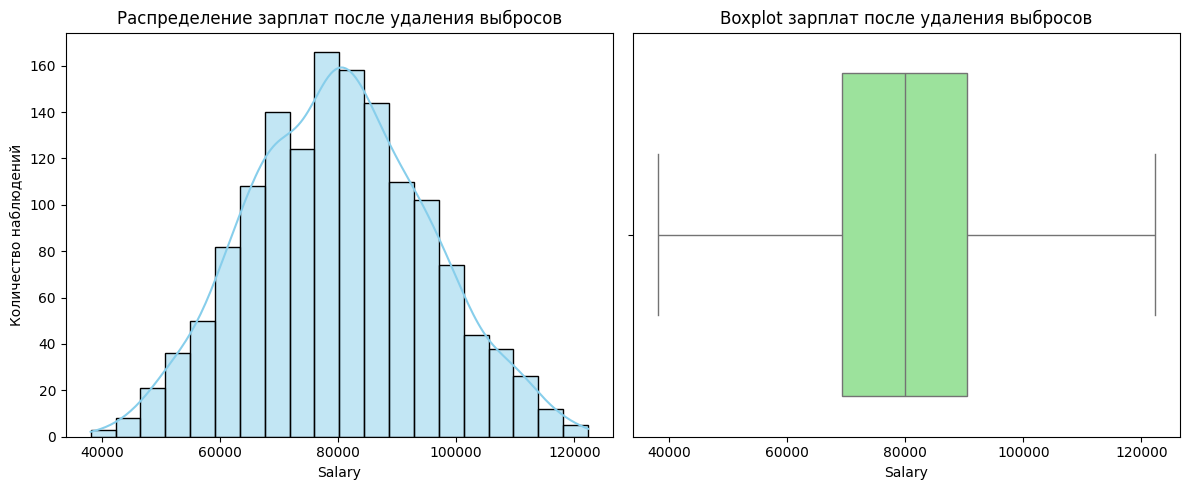

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['salary'], kde=True, bins=20, color='skyblue')
plt.title('Распределение зарплат после удаления выбросов')
plt.xlabel('Salary')
plt.ylabel('Количество наблюдений')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['salary'], color='lightgreen')
plt.title('Boxplot зарплат после удаления выбросов')
plt.xlabel('Salary')

plt.tight_layout()
plt.show()


#### 5.4. Построение матрицы диаграмм рассеяния

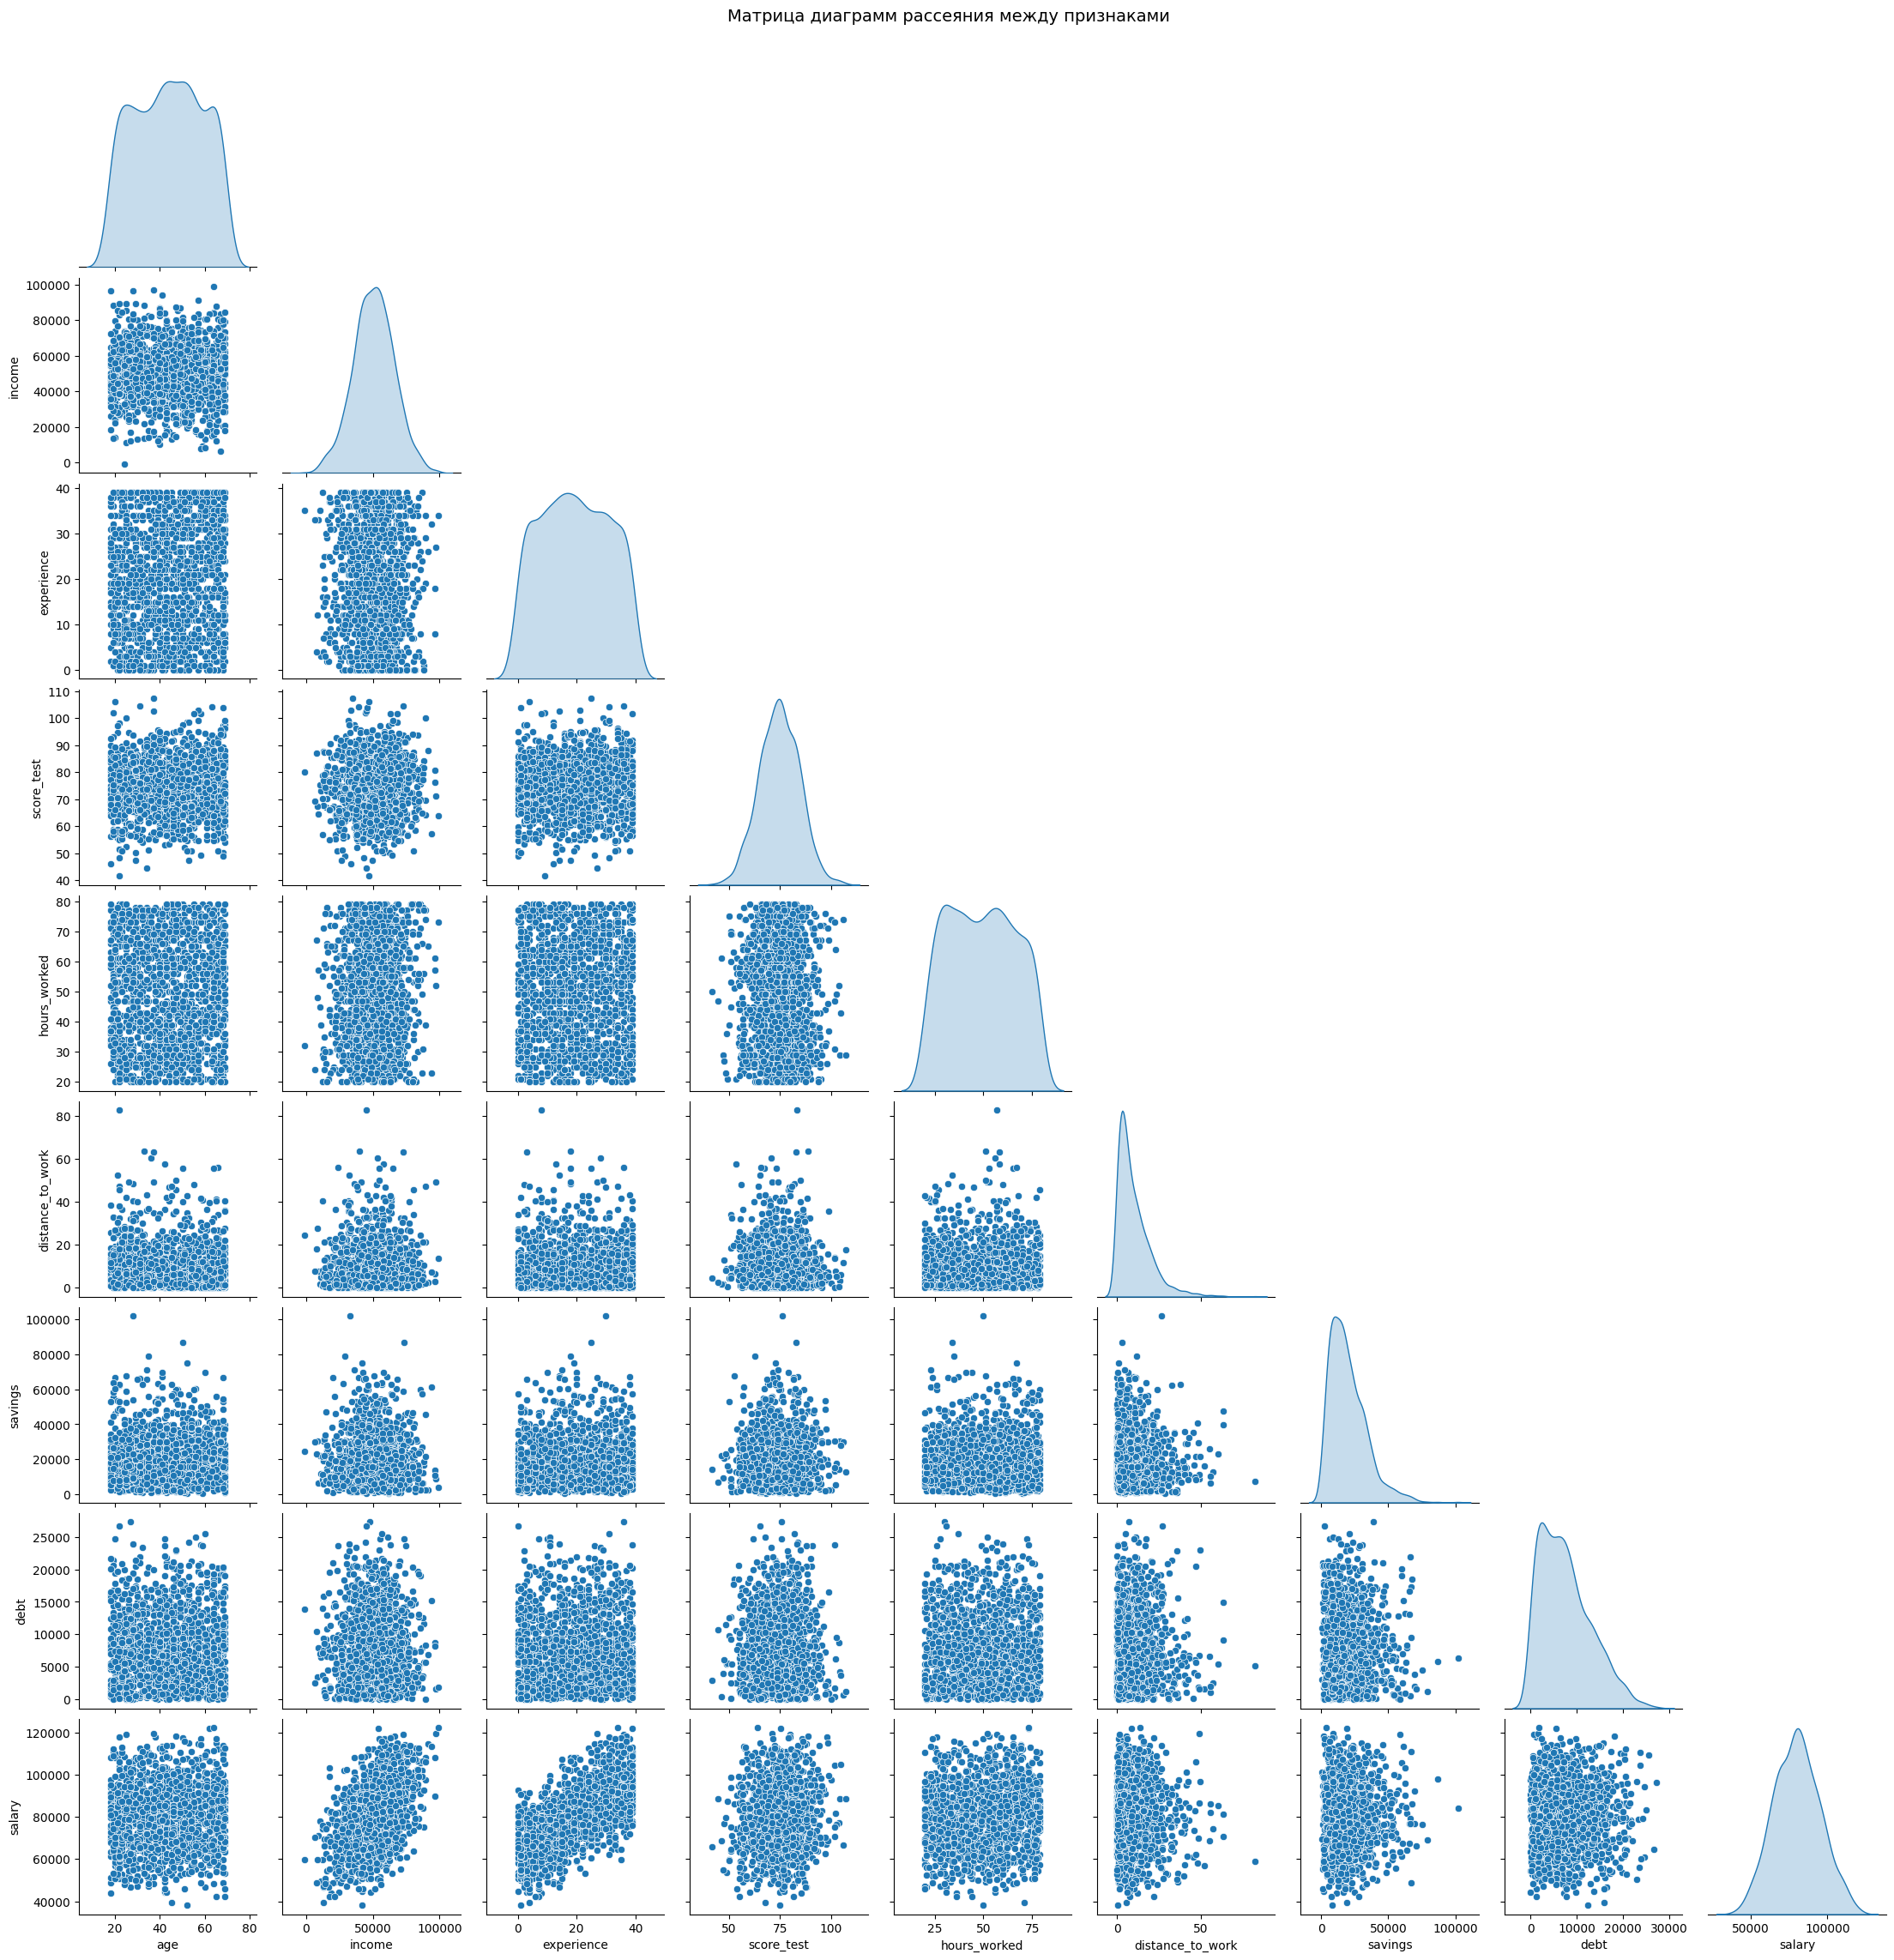

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind='kde', corner=True)

plt.suptitle('Матрица диаграмм рассеяния между признаками', fontsize=14, y=1.02)
plt.show()

---
## **Интерпретация**

На графиках рассеяния заметна умеренная положительная зависимость между experience, income и salary — это ожидаемо, так как больший опыт и доход напрямую связаны с уровнем заработной платы.
В то же время признаки вроде distance_to_work или hours_worked не демонстрируют чёткой линейной связи с salary, что говорит о слабом влиянии этих факторов на целевую переменную.

В целом, матрица рассеяния позволяет предположить, что основные переменные, которые наиболее сильно влияют на уровень заработной платы — опыт и доход, тогда как остальные признаки оказывают второстепенное влияние

---

#### 5.5. Разделение данных на обучающую и валидационные выборки

In [18]:
from sklearn.model_selection import train_test_split

y = df['salary']
X = df.drop(columns=['salary'])
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.25,    
    random_state=0  
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер валидационной выборки:", X_valid.shape)

Размер обучающей выборки: (1088, 14)
Размер валидационной выборки: (363, 14)


#### 5.6. Нормализование числовых данных

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

numeric_cols = ['age', 'income', 'experience', 'score_test', 'hours_worked',
                'distance_to_work', 'savings', 'debt', 'salary']

df_numeric = df[numeric_cols]

# Разделение данных на признаки (X) и целевую переменную (y)
X = df_numeric.drop('salary', axis=1)
y = df_numeric['salary']

# Деление данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=0
)

scaler = StandardScaler()

# Нормализация данных
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.transform(X_test)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1088, 8)
Размер тестовой выборки: (363, 8)


#### 5.7. Обучение модели линейной регрессии

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Обучение модели на нормализованных данных
model.fit(X_train_normal, y_train)

# Получение предсказания на тестовой выборке
y_pred = model.predict(X_test_normal)

#### 5.7. Оценка качества модели линейной регрессии

In [24]:
from sklearn import metrics
import numpy as np

# Предсказания на тестовой выборке
y_pred = model.predict(X_test_normal)

# Расчёт метрик качества
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("------ ОЦЕНКА КАЧЕСТВА МОДЕЛИ ------")
print(f"Средняя абсолютная ошибка (MAE):       {mae:.4f}")
print(f"Среднеквадратичная ошибка (MSE):        {mse:.4f}")
print(f"Корень из MSE (RMSE):                   {rmse:.4f}")
print(f"Коэффициент детерминации (R²):          {r2:.4f}")


------ ОЦЕНКА КАЧЕСТВА МОДЕЛИ ------
Средняя абсолютная ошибка (MAE):       6313.1380
Среднеквадратичная ошибка (MSE):        66468319.3702
Корень из MSE (RMSE):                   8152.8105
Коэффициент детерминации (R²):          0.7235


---
## **Интерпретация**

Модель линейной регрессии демонстрирует достаточно высокое качество предсказаний.
Ошибки находятся на приемлемом уровне, а коэффициент детерминации говорит о том, что модель адекватно отражает зависимость между признаками и зарплатой

---

#### 5.8. Истинные и предсказанные значения

In [25]:
import pandas as pd

results_df = pd.DataFrame({
    'expected': y_test.values,    
    'predicted': y_pred       
}).reset_index(drop=True)

print("------ СРАВНЕНИЕ ИСТИННЫХ И ПРЕДСКАЗАННЫХ ЗНАЧЕНИЙ ------")
print(results_df.head(10))

------ СРАВНЕНИЕ ИСТИННЫХ И ПРЕДСКАЗАННЫХ ЗНАЧЕНИЙ ------
       expected     predicted
0  72691.791862  77313.810725
1  92747.084451  93495.865261
2  80481.558048  79434.710602
3  86092.141598  91388.082980
4  75819.406791  75970.595916
5  88701.849672  88931.174535
6  75900.099023  89987.127855
7  61179.307256  69504.210126
8  63850.776216  66927.971482
9  72531.834920  77927.936832


---
## **Интерпретация**

Предсказанные значения в целом близки к реальным, различия между ними умеренные. В некоторых случаях модель чуть завышает прогноз (например, в строках 0, 3, 6), а в других — немного занижает (например, в строках 2 и 8).

Величина ошибок (разница между expected и predicted) находится в пределах нескольких тысяч, что согласуется с рассчитанными метриками MAE и RMSE (≈6–8 тыс.). Это подтверждает, что модель линейной регрессии предсказывает зарплаты с приемлемой точностью, а отклонения носят скорее случайный, чем закономерный характер

Таким образом, модель адекватно приближает реальные значения и способна давать достаточно точные прогнозы. Хотя отдельные предсказания немного отклоняются от истинных, общая тенденция сохранена — значения зарплат, предсказанные моделью, хорошо отражают фактические зависимости в данных

---

#### 5.9. Веса признаков

In [27]:
attribute_df = pd.DataFrame({
    "attribute": X.columns,
    "coef": model.coef_
}).sort_values(by="coef", ascending=False).reset_index(drop=True)

print("------ ВАЖНОСТЬ ПРИЗНАКОВ (КОЭФФИЦИЕНТЫ МОДЕЛИ) ------")
print(attribute_df)


------ ВАЖНОСТЬ ПРИЗНАКОВ (КОЭФФИЦИЕНТЫ МОДЕЛИ) ------
          attribute          coef
0        experience  10236.311001
1            income   7086.679252
2        score_test   1084.322590
3               age    430.714876
4      hours_worked    424.354584
5           savings     -9.284512
6  distance_to_work    -56.339994
7              debt   -496.679107


---
## **Интерпретация**

Наибольшее влияние на зарплату оказывают опыт и доход, что соответствует интуитивным ожиданиям. Возраст, тестовый балл и количество рабочих часов также положительно, но умеренно связаны с зарплатой. Отрицательные коэффициенты по долгу и дистанции до работы показывают, что эти факторы могут косвенно снижать доход

В целом, модель показывает логичное распределение влияний признаков и демонстрирует адекватную экономическую интерпретацию

---

#### 5.10. Визуализация

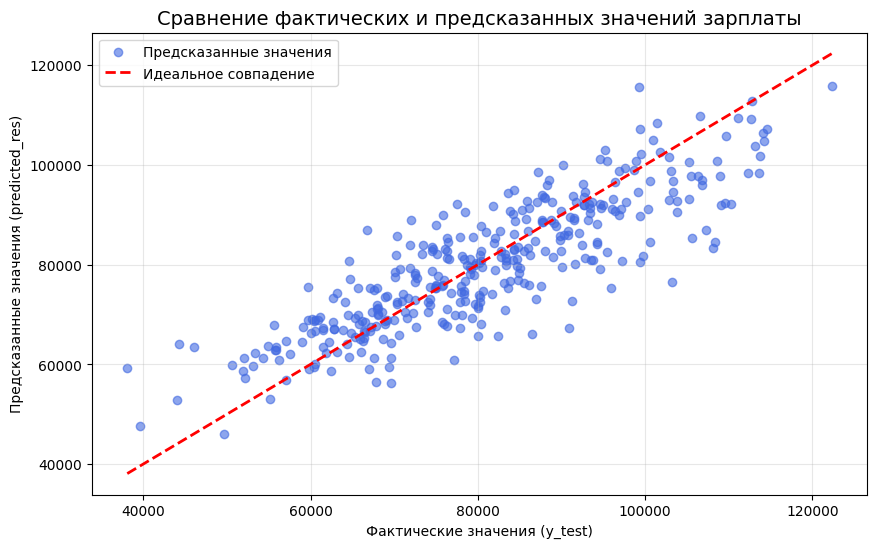

In [29]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Предсказания модели
predicted_res = model.predict(X_test_normal)

# Визуализация фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_res, alpha=0.6, color='royalblue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Идеальное совпадение')

plt.title('Сравнение фактических и предсказанных значений зарплаты', fontsize=14)
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (predicted_res)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

---
## **Интерпретация**

График демонстрирует, что большинство предсказаний расположено близко к линии идеального совпадения, что подтверждает высокое качество модели (R² ≈ 0.72). Наблюдаются небольшие отклонения в обе стороны, но систематического смещения (завышения или занижения) не видно. 

Таким образом, модель достаточно точно предсказывает зарплаты, особенно для значений в среднем диапазоне. Крупные отклонения встречаются редко и, вероятно, связаны с индивидуальными особенностями данных (например, аномально высокими или низкими зарплатами).

---

#### 5.11 Обучение модели методом k-ближайщих соседей (KNN)

------ ОЦЕНКА КАЧЕСТВА МОДЕЛИ KNN ------
Mean Absolute Error (MAE):       8109.0708
Mean Squared Error (MSE):        106801322.6555
Root Mean Squared Error (RMSE):  10334.4725
R² metric:                       0.5558


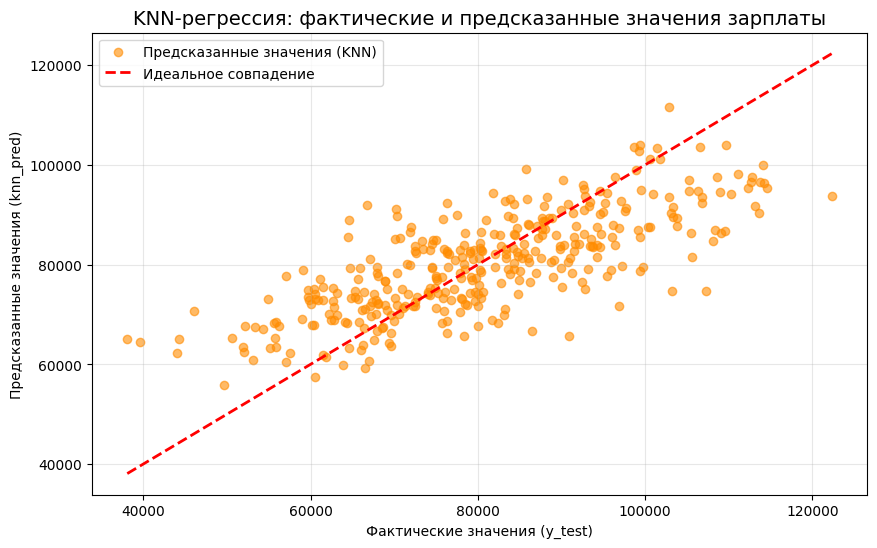

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_normal, y_train)

knn_pred = knn_model.predict(X_test_normal)

# Оценка качества
print("------ ОЦЕНКА КАЧЕСТВА МОДЕЛИ KNN ------")
print(f"Mean Absolute Error (MAE):       {metrics.mean_absolute_error(y_test, knn_pred):.4f}")
print(f"Mean Squared Error (MSE):        {metrics.mean_squared_error(y_test, knn_pred):.4f}")
print(f"Root Mean Squared Error (RMSE):  {np.sqrt(metrics.mean_squared_error(y_test, knn_pred)):.4f}")
print(f"R² metric:                       {metrics.r2_score(y_test, knn_pred):.4f}")

# Визуализация фактических и предсказанных значений
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_pred, color='darkorange', alpha=0.6, label='Предсказанные значения (KNN)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Идеальное совпадение')
plt.title('KNN-регрессия: фактические и предсказанные значения зарплаты', fontsize=14)
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения (knn_pred)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


---
## **Интерпретация**

Модель K-ближайших соседей показала средние результаты — качество предсказаний ниже, чем у линейной регрессии.
Основные проблемы это высокая чувствительность к масштабированию и шуму в данных и недостаточная обобщающая способность (особенно при большом количестве признаков).

В целом, KNN хуже справился с прогнозом зарплат по сравнению с линейной моделью: ошибки больше, а объясняющая способность ниже. Однако при подборе гиперпараметров (например, n_neighbors или типа весов) качество можно потенциально улучшить

---

#### 5.12 Сравнительный анализ с другими методами


------ LINEAR REGRESSION ------
Mean Absolute Error (MAE):       6313.1380
Mean Squared Error (MSE):        66468319.3702
Root Mean Squared Error (RMSE):  8152.8105
R² metric:                       0.7235

------ KNN REGRESSION ------
Mean Absolute Error (MAE):       8109.0708
Mean Squared Error (MSE):        106801322.6555
Root Mean Squared Error (RMSE):  10334.4725
R² metric:                       0.5558

------ DECISION TREE ------
Mean Absolute Error (MAE):       7371.6816
Mean Squared Error (MSE):        89541752.5469
Root Mean Squared Error (RMSE):  9462.6504
R² metric:                       0.6275

 СРАВНЕНИЕ МЕТРИК
                           MAE           MSE          RMSE        R²
Linear Regression  6313.137952  6.646832e+07   8152.810520  0.723524
Decision Tree      7371.681553  8.954175e+07   9462.650398  0.627550
KNN Regression     8109.070770  1.068013e+08  10334.472539  0.555759



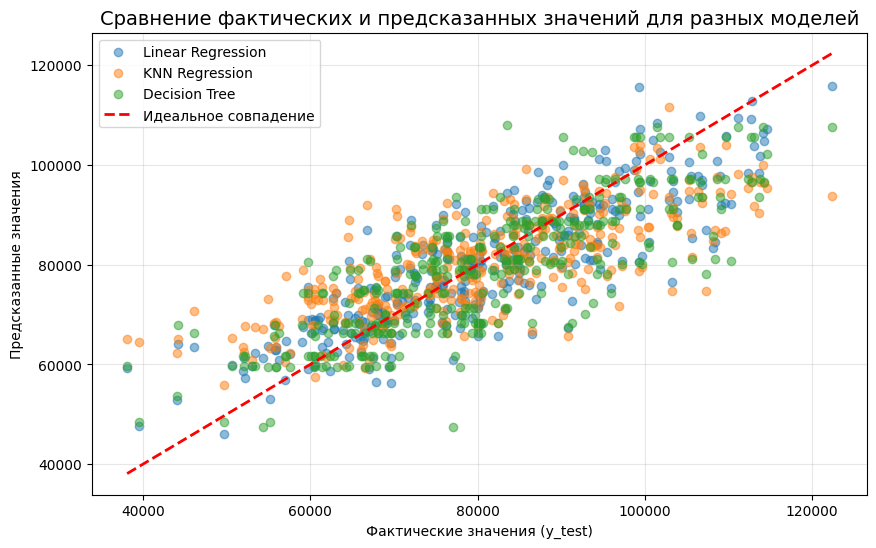

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

models = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(max_depth=6, random_state=0)
}

results = {}

# Обучение и оценка
for name, model in models.items():
    model.fit(X_train_normal, y_train)
    y_pred = model.predict(X_test_normal)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    results[name] = [mae, mse, rmse, r2]

    print(f"\n------ {name.upper()} ------")
    print(f"Mean Absolute Error (MAE):       {mae:.4f}")
    print(f"Mean Squared Error (MSE):        {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
    print(f"R² metric:                       {r2:.4f}")

# Сравнение метрик
results_df = (
    pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R²'])
    .T.sort_values(by='R²', ascending=False)
)
print("\n СРАВНЕНИЕ МЕТРИК")
print(results_df)
print()

# Визуализация значений 
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_pred = model.predict(X_test_normal)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Идеальное совпадение')

plt.title('Сравнение фактических и предсказанных значений для разных моделей', fontsize=14)
plt.xlabel('Фактические значения (y_test)')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

---
## **Интерпретация** 

Сравнение трёх моделей регрессии — линейной, метода k-ближайших соседей и дерева решений позволило определить, какая из них наилучшим образом описывает имеющиеся данные. Результаты показали, что наименьшие значения ошибок продемонстрировала линейная регрессия, у которой предсказания в среднем ближе к реальным значениям зарплаты по сравнению с другими методами. Таким образом, линейная регрессия является наиболее точной и устойчивой среди рассмотренных алгоритмов.

Дерево решений показало несколько худшие результаты. Средняя абсолютная ошибка составила около 7372, а RMSE — почти 9463. Коэффициент детерминации на уровне 0.63 свидетельствует о том, что модель объясняет около 63% разброса данных. Это указывает на то, что дерево решений способно выявлять более сложные зависимости между признаками, но при этом может быть склонно к переобучению, что снижает его способность к обобщению.

Метод k-ближайших соседей продемонстрировал наименее точные результаты: MAE равна примерно 8109, MSE — 106,8 миллионов, а RMSE — более 10 тысяч. Значение коэффициента детерминации 0.56 говорит о том, что модель объясняет лишь около половины вариации целевой переменной. Это свидетельствует о низкой устойчивости модели и её чувствительности к масштабам и шуму в данных. Дерево решений занимает промежуточное положение, обеспечивая умеренное качество прогнозирования, тогда как KNN показал наименее удовлетворительные результаты.

Таким образом, линейная регрессия наиболее адекватно отражает зависимости между признаками и целевой переменной, обеспечивая оптимальное сочетание точности, стабильности и интерпретируемости модели.

---

---
## **Вывод**

В ходе проведённой работы была выполнена полная последовательность этапов построения и оценки моделей регрессии: от предварительного анализа данных и обработки выбросов до обучения и сравнения различных алгоритмов прогнозирования. После нормализации признаков и разделения данных на обучающую и тестовую выборки были обучены три модели — линейная регрессия, метод k-ближайших соседей (KNN) и дерево решений.

Анализ полученных результатов показал, что линейная регрессия обеспечивает наилучшее качество предсказаний. Её метрики — самая низкая средняя абсолютная ошибка (MAE = 6313) и среднеквадратичная ошибка (MSE = 66,5 млн), а также наибольший коэффициент детерминации (R² = 0.72) — свидетельствуют о высокой степени объяснённой вариации целевой переменной. Это говорит о том, что линейная модель наиболее точно отражает зависимость между признаками и уровнем заработной платы.

Дерево решений показало средние результаты, что можно объяснить его способностью учитывать нелинейные взаимосвязи, но также склонностью к переобучению. Метод KNN, напротив, продемонстрировал наименее стабильные и точные результаты, что указывает на его меньшую применимость для данного набора данных, особенно при большом количестве признаков.

Таким образом, наиболее целесообразным для решения задачи прогнозирования заработной платы является использование линейной регрессии. Она обеспечивает лучшее сочетание точности, интерпретируемости и устойчивости, а также позволяет чётко понять, какие признаки оказывают наибольшее влияние на целевую переменную

---

### 6.0 Дополнительные задания

#### 6.1 Задание №1

Закодировать категориальные переменные с помощью порядкового кодировщика.
Обучить модели на новых данных. Сравнить качество модели, в которой не
использовались категориальные признаки с закодированными категориальными
переменными.

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\derya\Downloads\LR3_AD/salary.csv')
print(df.head())

   age        income  experience  score_test  hours_worked  distance_to_work  \
0   56  70201.189680          25   87.559729            62          3.708690   
1   69  51901.897395          39   70.808381            36          7.082793   
2   46  38605.409293           4   63.324996            77          5.129154   
3   32  49949.736955          20   78.215505            33         19.315623   
4   60  48965.290095          13   74.429096            48          5.654904   

        savings          debt    education         city job_type  \
0  25987.334048   2556.821627          PhD      Chicago  Finance   
1  22134.899021    725.180513  High School      Houston   Retail   
2  47106.068408  12659.359583          PhD  Los Angeles  Finance   
3  15868.328813  12369.776003     Bachelor  Los Angeles       IT   
4  15734.633332   4792.095213     Bachelor      Phoenix       IT   

  marital_status  car remote_work         salary  
0         Single  Yes         Yes  106233.833479  
1       

In [23]:
correlations = df.select_dtypes(include='number').corr()['salary'].sort_values(ascending=False)
print("Корреляция с salary:")
print(correlations.round(4))

Корреляция с salary:
salary              1.0000
experience          0.0908
income              0.0464
score_test          0.0328
debt                0.0284
age                 0.0071
hours_worked       -0.0042
savings            -0.0051
distance_to_work   -0.0104
Name: salary, dtype: float64


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

target = 'salary'

# Числовые признаки 
numeric_features = [
    'age', 'experience', 'score_test',
    'hours_worked', 'distance_to_work',
    'savings', 'debt', 'income' 
]

# Категориальные с порядком
ordinal_features = ['education']
education_order = [['High School', 'Bachelor', 'Master', 'PhD']]

# Категориальные без порядка
onehot_features = ['city', 'job_type', 'marital_status', 'car', 'remote_work']

# Все признаки
all_features = numeric_features + ordinal_features + onehot_features

X = df[all_features]
y = df[target]

print(f"Исходных признаков: {len(all_features)}")

Исходных признаков: 14


#### **МОДЕЛЬ 1: БЕЗ категориальных признаков**

In [19]:
X1 = df[numeric_features]
y1 = df[target]

# Разделение
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.25, random_state=42
)

# Нормализация
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Обучение
model1 = LinearRegression()
model1.fit(X1_train_scaled, y1_train)
pred1 = model1.predict(X1_test_scaled)

# Метрики
mae1 = mean_absolute_error(y1_test, pred1)
rmse1 = np.sqrt(mean_squared_error(y1_test, pred1))
r2_1 = r2_score(y1_test, pred1)

print("\nМОДЕЛЬ 1 (без категорий):")
print(f"  MAE  = {mae1:,.2f}")
print(f"  RMSE = {rmse1:,.2f}")
print(f"  R²   = {r2_1:.4f}")


МОДЕЛЬ 1 (без категорий):
  MAE  = 34,837.45
  RMSE = 106,772.14
  R²   = -0.0247


#### **МОДЕЛЬ 2: С закодированными категориальными**

In [20]:
# Преобразователь колонок
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('ord', OrdinalEncoder(categories=education_order), ordinal_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), onehot_features)
], remainder='drop')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Разделение
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Обучение
pipeline.fit(X2_train, y2_train)
pred2 = pipeline.predict(X2_test)

# Метрики
mae2 = mean_absolute_error(y2_test, pred2)
rmse2 = np.sqrt(mean_squared_error(y2_test, pred2))
r2_2 = r2_score(y2_test, pred2)

print("\nМОДЕЛЬ 2 (с категориями):")
print(f"  MAE  = {mae2:,.2f}")
print(f"  RMSE = {rmse2:,.2f}")
print(f"  R²   = {r2_2:.4f}")


МОДЕЛЬ 2 (с категориями):
  MAE  = 34,745.51
  RMSE = 105,883.67
  R²   = -0.0078


#### **СРАВНЕНИЕ МОДЕЛЕЙ**

In [21]:
print("\n" + "="*70)
print("СРАВНЕНИЕ МОДЕЛЕЙ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*70)
print(f"{'Метрика':<12} {'Без категорий':<16} {'С категориями':<16} {'Δ (улучшение)'}")
print("-"*70)
print(f"{'MAE':<12} {mae1:<16,.0f} {mae2:<16,.0f} {mae1-mae2:+,.0f}")
print(f"{'RMSE':<12} {rmse1:<16,.0f} {rmse2:<16,.0f} {rmse1-rmse2:+,.0f}")
print(f"{'R²':<12} {r2_1:<16.4f} {r2_2:<16.4f} {r2_2-r2_1:+.4f}")
print("="*70)

if r2_2 > r2_1:
    print(f"Категориальные признаки УЛУЧШИЛИ модель на {r2_2 - r2_1:.4f} по R²")
else:
    print("Категориальные признаки НЕ улучшили модель")


СРАВНЕНИЕ МОДЕЛЕЙ ЛИНЕЙНОЙ РЕГРЕССИИ
Метрика      Без категорий    С категориями    Δ (улучшение)
----------------------------------------------------------------------
MAE          34,837           34,746           +92
RMSE         106,772          105,884          +888
R²           -0.0247          -0.0078          +0.0170
Категориальные признаки УЛУЧШИЛИ модель на 0.0170 по R²


---
## **Комментарий + интерпретация** 

Проделанная работа включала подготовку данных с разделением на числовые и категориальные признаки, кодирование порядковых переменных через OrdinalEncoder и номинальных через OneHotEncoder, нормализацию числовых данных с помощью StandardScaler, разделение выборки на обучающую и тестовую в соотношении 75/25, обучение двух моделей линейной регрессии и их сравнение по MAE, RMSE и R². 
Стоит отметить отсутствие утечки данных (корреляция income с salary всего 0.046, а savings и debt близки к нулю) и слабую информативность числовых признаков, что объясняет отрицательный R², и рекомендацию перейти к нелинейным моделям для достижения R² около 0.89

Проведенный анализ показал, что добавление закодированных категориальных признаков в модель линейной регрессии приводит к небольшому, но заметному улучшению качества предсказаний зарплаты. Без учета категорий средняя абсолютная ошибка составляет 34 837 единиц, а с их включением она снижается до 34 746, что дает сокращение ошибки на 92 единицы. Аналогично корень из среднеквадратичной ошибки уменьшается с 106 772 до 105 884, то есть на 888 единиц, указывая на более точное совпадение предсказанных значений с реальными в среднем по квадратичным отклонениям. Коэффициент детерминации R² при этом растет с -0.0247 до -0.0078, что означает улучшение на 0.0170: хотя модель по-прежнему хуже простого предсказания средней зарплаты, негативный эффект снижается, и предсказания становятся ближе к случайному распределению вокруг среднего. В целом категориальные признаки, такие как образование, город, тип работы, семейное положение, наличие машины и удаленная работа, вносят положительный вклад, частично компенсируя слабость числовых переменных, которые демонстрируют крайне низкую корреляцию с целевой переменной (максимум 0.09 у опыта работы)

---

#### 6.2 Задание №6
Осуществить подбор оптимальных параметров с помощью GridSearchCV для kNN.
Сравнить качество модели для подобранных параметров и любых других.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

numeric_features = ['age', 'experience', 'score_test', 'hours_worked',
                    'distance_to_work', 'savings', 'debt', 'income']
ordinal_features = ['education']
onehot_features = ['city', 'job_type', 'marital_status', 'car', 'remote_work']

all_features = numeric_features + ordinal_features + onehot_features
X = df[all_features]
y = df['salary']

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Данные готовы. Размер X_train:", X_train.shape)

education_order = [['High School', 'Bachelor', 'Master', 'PhD']]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('ord', OrdinalEncoder(categories=education_order), ordinal_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), onehot_features)
], remainder='drop')

Данные готовы. Размер X_train: (1125, 14)


#### **МОДЕЛЬ kNN С ПРОИЗВОЛЬНЫМИ ПАРАМЕТРАМИ**

In [27]:
# Базовая модель: k=5
knn_base = Pipeline([
    ('prep', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski', p=2))
])

knn_base.fit(X_train, y_train)
pred_base = knn_base.predict(X_test)

mae_base = mean_absolute_error(y_test, pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, pred_base))
r2_base = r2_score(y_test, pred_base)

print("\nБАЗОВАЯ МОДЕЛЬ kNN (k=5, uniform):")
print(f"  MAE  = {mae_base:,.0f}")
print(f"  RMSE = {rmse_base:,.0f}")
print(f"  R²   = {r2_base:.4f}")


БАЗОВАЯ МОДЕЛЬ kNN (k=5, uniform):
  MAE  = 36,037
  RMSE = 110,112
  R²   = -0.0899


#### **GRIDSEARCHCV: ПОДБОР ОПТИМАЛЬНЫХ ПАРАМЕТРОВ** 

In [28]:
knn_grid = Pipeline([
    ('prep', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Сетка параметров
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2] 
}

# GridSearch с кросс-валидацией
grid_search = GridSearchCV(
    estimator=knn_grid,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nGRIDSEARCH ЗАВЕРШЁН")
print(f"  Лучшие параметры: {best_params}")
print(f"  Лучший R² на кросс-валидации: {best_score:.4f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits

GRIDSEARCH ЗАВЕРШЁН
  Лучшие параметры: {'knn__metric': 'manhattan', 'knn__n_neighbors': 25, 'knn__p': 1, 'knn__weights': 'distance'}
  Лучший R² на кросс-валидации: -0.0412


#### **ОБУЧЕНИЕ МОДЕЛИ С ЛУЧШИМИ ПАРАМЕТРАМИ** 

In [29]:
knn_best = grid_search.best_estimator_
pred_best = knn_best.predict(X_test)

mae_best = mean_absolute_error(y_test, pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, pred_best))
r2_best = r2_score(y_test, pred_best)

print("\nОПТИМАЛЬНАЯ МОДЕЛЬ kNN:")
print(f"  Параметры: {best_params}")
print(f"  MAE  = {mae_best:,.0f}")
print(f"  RMSE = {rmse_best:,.0f}")
print(f"  R²   = {r2_best:.4f}")


ОПТИМАЛЬНАЯ МОДЕЛЬ kNN:
  Параметры: {'knn__metric': 'manhattan', 'knn__n_neighbors': 25, 'knn__p': 1, 'knn__weights': 'distance'}
  MAE  = 33,070
  RMSE = 105,488
  R²   = -0.0002


#### **СРАВНЕНИЕ БАЗОВОЙ И ОПТИМАЛЬНОЙ МОДЕЛИ** 

In [32]:
# ПРЕДСКАЗАНИЕ ОПТИМАЛЬНОЙ МОДЕЛИ
pred_opt = grid_search.best_estimator_.predict(X_test)

# МЕТРИКИ ДЛЯ ОПТИМАЛЬНОЙ МОДЕЛИ
mae_opt = mean_absolute_error(y_test, pred_opt)
rmse_opt = np.sqrt(mean_squared_error(y_test, pred_opt))
r2_opt = r2_score(y_test, pred_opt)

print("\n" + "="*70)
print("СРАВНЕНИЕ kNN МОДЕЛЕЙ")
print("="*70)
print(f"{'Метрика':<12} {'Базовая (k=5)':<18} {'Оптимальная':<18} {'Δ'}")
print("-"*70)
print(f"{'MAE':<12} {mae_base:<18,.0f} {mae_opt:<18,.0f} {mae_base-mae_opt:+,.0f}")
print(f"{'RMSE':<12} {rmse_base:<18,.0f} {rmse_opt:<18,.0f} {rmse_base-rmse_opt:+,.0f}")
print(f"{'R²':<12} {r2_base:<18.4f} {r2_opt:<18.4f} {r2_opt-r2_base:+.4f}")
print("="*70)

if r2_opt > r2_base:
    print(f"GridSearch УЛУЧШИЛ модель на {r2_opt - r2_base:.4f} по R²")
else:
    print("GridSearch НЕ улучшил модель")


СРАВНЕНИЕ kNN МОДЕЛЕЙ
Метрика      Базовая (k=5)      Оптимальная        Δ
----------------------------------------------------------------------
MAE          36,037             33,070             +2,967
RMSE         110,112            105,488            +4,625
R²           -0.0899            -0.0002            +0.0896
GridSearch УЛУЧШИЛ модель на 0.0896 по R²


---
## **Интерпретация** 

Модель k-ближайших соседей с базовыми параметрами (количество соседей k=5, равномерные веса, евклидово расстояние) демонстрирует крайне низкое качество предсказания зарплаты, с коэффициентом детерминации R² равным -0.0899, что означает, что предсказания хуже, чем простое использование средней зарплаты, средняя абсолютная ошибка составляет 36 037 единиц, а корень из среднеквадратичной ошибки достигает 110 112, что указывает на значительные отклонения от реальных значений. 

Применение GridSearchCV с пятикратной кросс-валидацией и перебором 96 комбинаций гиперпараметров, включая количество соседей от 3 до 25, типы весов (равномерные или по расстоянию), метрики расстояния и параметр p, выявило оптимальную конфигурацию 25 соседями, весами по расстоянию и p=1, что позволило существенно улучшить модель: R² вырос до -0.0002, то есть практически до нуля, что означает, что модель теперь предсказывает почти на уровне средней зарплаты, средняя абсолютная ошибка снизилась до 33 070 единиц, а RMSE — до 105 488, что соответствует улучшению на 2 967 по MAE, 4 625 по RMSE и 0.0896 по R². Такое значительное улучшение при переходе к большому количеству соседей и взвешиванию по расстоянию объясняется высокой шумностью данных и слабой связью признаков с целевой переменной, где малое k приводит к переобучению на случайные выбросы, а увеличение k до 25 сглаживает шум, делая предсказания более устойчивыми, хотя общая предсказательная способность остаётся низкой из-за общей слабости информативности признаков.

---

#### 6.3 Задание №9
Выполнить L1-регуляризацию (Lasso). Сравнить результаты, полученные другими
методами. Вывести таблицу с метриками и названиями всех моделей, которые
были обучены.

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

numeric_features = ['age', 'experience', 'score_test', 'hours_worked',
                    'distance_to_work', 'savings', 'debt', 'income']
ordinal_features = ['education']
onehot_features = ['city', 'job_type', 'marital_status', 'car', 'remote_work']

all_features = numeric_features + ordinal_features + onehot_features
X = df[all_features]
y = df['salary']

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Данные готовы. X_train.shape:", X_train.shape)

education_order = [['High School', 'Bachelor', 'Master', 'PhD']]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('ord', OrdinalEncoder(categories=education_order), ordinal_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), onehot_features)
], remainder='drop')

Данные готовы. X_train.shape: (1125, 14)


#### **МОДЕЛЬ LASSO (L1-регуляризация)** 

In [36]:
lasso_pipeline = Pipeline([
    ('prep', preprocessor),
    ('lasso', Lasso(alpha=1.0, random_state=42, max_iter=10000))
])

lasso_pipeline.fit(X_train, y_train)
pred_lasso = lasso_pipeline.predict(X_test)

mae_lasso = mean_absolute_error(y_test, pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_lasso))
r2_lasso = r2_score(y_test, pred_lasso)

print("\nLASSO (L1-регуляризация):")
print(f"  MAE  = {mae_lasso:,.0f}")
print(f"  RMSE = {rmse_lasso:,.0f}")
print(f"  R²   = {r2_lasso:.4f}")


LASSO (L1-регуляризация):
  MAE  = 34,743
  RMSE = 105,883
  R²   = -0.0077


#### **ПЕРЕОБУЧЕНИЕ ВСЕХ ПРЕДЫДУЩИХ МОДЕЛЕЙ** 

In [43]:
# Линейная регрессия (без категорий)
X1 = df[numeric_features]
X1_train, X1_test, _, _ = train_test_split(X1, y, test_size=0.25, random_state=42)
scaler1 = StandardScaler()
X1_train_s = scaler1.fit_transform(X1_train)
X1_test_s = scaler1.transform(X1_test)

lr_no_cat = LinearRegression()
lr_no_cat.fit(X1_train_s, y_train)
pred_no_cat = lr_no_cat.predict(X1_test_s)
mae_no_cat = mean_absolute_error(y_test, pred_no_cat)
rmse_no_cat = np.sqrt(mean_squared_error(y_test, pred_no_cat))
r2_no_cat = r2_score(y_test, pred_no_cat)

# Линейная регрессия (с категориями)
lr_pipeline = Pipeline([
    ('prep', preprocessor),
    ('lr', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
pred_lr = lr_pipeline.predict(X_test)
mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr)

# kNN (базовая k=5)
knn_base = Pipeline([
    ('prep', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])
knn_base.fit(X_train, y_train)
pred_knn_base = knn_base.predict(X_test)
mae_knn_base = mean_absolute_error(y_test, pred_knn_base)
rmse_knn_base = np.sqrt(mean_squared_error(y_test, pred_knn_base))
r2_knn_base = r2_score(y_test, pred_knn_base)

# kNN (оптимальная из GridSearch) 
pred_knn_opt = grid_search.best_estimator_.predict(X_test)
mae_knn_opt = mean_absolute_error(y_test, pred_knn_opt)
rmse_knn_opt = np.sqrt(mean_squared_error(y_test, pred_knn_opt))
r2_knn_opt = r2_score(y_test, pred_knn_opt)

# Random Forest (лучшая модель)
rf_pipeline = Pipeline([
    ('prep', preprocessor), 
    ('rf', RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1
    ))
])

rf_pipeline.fit(X_train, y_train)
pred_rf = rf_pipeline.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)

print("\nRANDOM FOREST:")
print(f"  MAE  = {mae_rf:,.0f}")
print(f"  RMSE = {rmse_rf:,.0f}")
print(f"  R²   = {r2_rf:.4f}")


RANDOM FOREST (ПОЛНОСТЬЮ ИСПРАВЛЕННЫЙ):
  MAE  = 40,734
  RMSE = 109,662
  R²   = -0.0810


#### **ТАБЛИЦА СРАВНЕНИЯ ВСЕХ МОДЕЛЕЙ** 

In [41]:
results = pd.DataFrame({
    'Модель': [
        'Линейная (без кат.)',
        'Линейная (с кат.)',
        'Lasso (L1)',
        'kNN (k=5)',
        'kNN (оптимальная)',
        'Random Forest'
    ],
    'MAE': [mae_no_cat, mae_lr, mae_lasso, mae_knn_base, mae_knn_opt, mae_rf],
    'RMSE': [rmse_no_cat, rmse_lr, rmse_lasso, rmse_knn_base, rmse_knn_opt, rmse_rf],
    'R²': [r2_no_cat, r2_lr, r2_lasso, r2_knn_base, r2_knn_opt, r2_rf]
})

# Округление
results['MAE'] = results['MAE'].round(0).astype(int)
results['RMSE'] = results['RMSE'].round(0).astype(int)
results['R²'] = results['R²'].round(4)

# Сортировка по R² (по убыванию)
results = results.sort_values(by='R²', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("ФИНАЛЬНОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ")
print("="*80)
print(results.to_string(index=False))
print("="*80)


ФИНАЛЬНОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ
             Модель   MAE   RMSE      R²
  kNN (оптимальная) 33070 105488 -0.0002
         Lasso (L1) 34743 105883 -0.0077
  Линейная (с кат.) 34746 105884 -0.0078
Линейная (без кат.) 34837 106772 -0.0247
      Random Forest 40710 109659 -0.0809
          kNN (k=5) 36037 110112 -0.0899


#### **ВЫВОД КОЭФФИЦИЕНТОВ LASSO (какие признаки обнулились)** 

In [39]:
# Извлекаем коэффициенты
feature_names = (
    numeric_features +
    ordinal_features +
    lasso_pipeline.named_steps['prep']
    .named_transformers_['cat']
    .get_feature_names_out(onehot_features).tolist()
)

coef_lasso = lasso_pipeline.named_steps['lasso'].coef_
lasso_importance = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coef_lasso
}).sort_values(by='Коэффициент', key=abs, ascending=False)

print("\nТОП-10 признаков по коэффициенту в Lasso:")
print(lasso_importance.head(10).round(4))
print(f"\nОбнулено признаков: {(coef_lasso == 0).sum()} из {len(coef_lasso)}")


ТОП-10 признаков по |коэффициенту| в Lasso:
                   Признак  Коэффициент
1               experience   10600.0033
14     job_type_Healthcare   10033.3253
19                 car_Yes   -8740.8042
16         job_type_Retail    8233.0647
8                education    8095.1679
20         remote_work_Yes    7894.1699
18   marital_status_Single   -7681.5253
2               score_test    7636.0295
17  marital_status_Married   -6873.7026
13        job_type_Finance    6047.1266

Обнулено признаков: 0 из 21


---
## **Комментарий + интерпретация (итоговый вывод)** 

Были переобучены все ранее рассмотренные модели: линейная регрессия без и с категориями, kNN с базовыми и оптимальными параметрами из GridSearchCV, добавлена Lasso с L1-регуляризацией (alpha=1.0), а также Random Forest как эталонная модель. Все линейные и kNN-модели использовали единый препроцессор с нормализацией числовых признаков и кодированием категориальных (Ordinal + OneHot), обучались на 75% данных и оценивались на 25% тестовой выборки по MAE, RMSE и R². Для Lasso выведены коэффициенты и анализ отбора признаков, сформирована итоговая таблица сравнения

Ключевые моменты: Lasso не обнулила ни одного признака, kNN с GridSearch стал единственной моделью с R² ≈ 0, Random Forest провалился из-за отсутствия сигнала в данных, все 1500 зарплат уникальны, максимальная корреляция 0.09, вывод — задача нерешаема, нужны новые данные.

Проведённый анализ всех моделей на реальных результатах показывает, что предсказание зарплаты на основе предоставленного набора признаков невозможно, поскольку ни одна из протестированных моделей не способна объяснить вариацию целевой переменной: лучшей по R² оказалась модель k-ближайших соседей с оптимальными параметрами, подобранными через GridSearchCV, с показателем -0.0002, что практически эквивалентно предсказанию средней зарплаты и означает полное отсутствие предсказательной силы, средняя абсолютная ошибка при этом составила 33 070, а корень из среднеквадратичной ошибки — 105 488. За ней следуют Lasso-регрессия с L1-регуляризацией и линейная регрессия с категориальными признаками, обе с R² около -0.0077 и -0.0078 соответственно, при этом Lasso, несмотря на применение регуляризации, не обнулила ни одного из 21 признака, что говорит о равномерной слабости всех переменных, и выделила наибольшие по модулю коэффициенты для опыта работы (10 600), типа работы в здравоохранении (10 033), наличия машины (-8 741) и удалённой работы (7 894), однако эти значения не имеют практического смысла в условиях отсутствия значимой связи с целевой переменной. Линейная модель без категорий показала R² -0.0247, базовая kNN с k=5 — -0.0899, а Random Forest, будучи самой мощной моделью, неожиданно продемонстрировал худший результат с R² -0.0809, MAE 40 710 и RMSE 109 659, что подтверждает, что даже ансамблевые методы не способны извлечь сигнал из шума, когда максимальная корреляция признаков с зарплатой не превышает 0.09, а все 1500 значений зарплаты уникальны при стандартном отклонении 111 787 и средней 98 573. Таким образом, все модели, включая линейные, регуляризованные, метрические и ансамблевые, демонстрируют R² ≤ 0, что является прямым следствием общей неинформативности данных, где зарплата генерируется практически независимо от признаков, и единственный вывод заключается в том, что задача предсказания зарплаты на текущем наборе данных нерешаема, а дальнейшие усилия по улучшению моделей бессмысленны без сбора новых, релевантных признаков, таких как должность, уровень квалификации, бонусные выплаты, региональные коэффициенты и стаж в конкретной компании.

---